# RNN Model with APM Train/Test Datasets

In [4]:
import os
import sys
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from src.rnn import rnn_standard

In [3]:
sys.path.append('/home/bilgecan_cihan/audio-predictive-maintenance/data_science')
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [5]:
data_df_train = pd.read_json('10-percent-steps_rep-5_train_normalized_simple-label.json')
data_df_test = pd.read_json('10-percent-steps_rep-1_test_normalized_simple-label.json')

In [6]:
data_df_train

,feature,label
0,"[[-44.9009857178, -44.7555046082, -44.43334960...",fan_1
1,"[[-44.9512023926, -44.7372093201, -44.39308929...",fan_1
2,"[[-38.3995361328, -38.6569862366, -38.42105102...",fan_1
3,"[[-40.3605003357, -40.6031074524, -40.55823516...",fan_1
4,"[[-44.6894302368, -44.5292167664, -45.07926940...",fan_1
...,...,...
1195,"[[-41.3490257263, -41.7729606628, -41.63163757...",motor_2
1196,"[[-45.2954330444, -45.4075813293, -45.22653579...",fan_1
1197,"[[-45.3467025757, -45.4594841003, -45.26631927...",fan_1
1198,"[[-39.0949440002, -39.1971817017, -39.06533050...",fan_1


In [7]:
data_df_test

,feature,label
0,"[[-47.054058075, -46.9748497009, -46.735279083...",fan_1
1,"[[-47.1146469116, -47.0218353271, -46.72413635...",fan_1
2,"[[-39.7518539429, -39.7977256775, -40.03094100...",fan_1
3,"[[-42.3931388855, -42.1028633118, -41.96956634...",fan_1
4,"[[-46.2658996582, -46.4230384827, -46.48614883...",fan_1
...,...,...
67,"[[-42.2498664856, -42.193775177, -42.207748413...",motor_2
68,"[[-47.0966911316, -46.6492156982, -46.24633789...",fan_1
69,"[[-47.0666618347, -46.6314315796, -46.25918960...",fan_1
70,"[[-39.5437393188, -39.5469551086, -39.22060012...",fan_1


In [17]:
X_array_train = np.array(data_df_train.feature.tolist())
y_array_train = np.array(data_df_train.label.tolist())

X_array_test = np.array(data_df_test.feature.tolist())
y_array_test = np.array(data_df_test.label.tolist())

le = LabelEncoder()

print("Training data shape:", X_array_train.shape)

num_rows = X_array_train.shape[1]
num_columns = X_array_train.shape[2]
num_channels = 1
splits = 5

num_outputs = data_df_train['label'].unique().shape[0]
print(num_rows)

Training data shape: (1200, 40, 173)
40


In [18]:
X_train, X_test = X_array_train, X_array_test
y_train, y_test = y_array_train, y_array_test

print(X_train.shape)

X_train = X_train.reshape(X_train.shape[0], num_columns, num_rows)
X_test = X_test.reshape(X_test.shape[0], num_columns, num_rows)

print(X_train.shape)
print(X_test.shape)

(1200, 40, 173)
(1200, 173, 40)
(72, 173, 40)


In [19]:
y_train = to_categorical(le.fit_transform(y_train))
print(y_train.shape)
y_test = to_categorical(le.fit_transform(y_test))
print(y_test.shape)

(1200, 6)
(72, 6)


In [20]:
# With early stopping
model = rnn_standard.RNN_std(num_outputs)
model.initialize(X_test, y_test)

history, duration = model.train(X_train, X_test, y_train, y_test, batch_size=128,
                                num_epochs=1000, early_stop=True, patience=50)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 128)               86528     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 774       
Total params: 103,814
Trainable params: 103,814
Non-trainable params: 0
_________________________________________________________________
3/3 [==============================] - 0s 5ms/step - loss: 1.8294 - accuracy: 0.1944
Pre-training accuracy: 19.444

10/10 [==============================] - 0s 22ms/step - loss: 1.1836 - accuracy: 0.5600 - val_loss: 2.4640 - val_accuracy: 0.1944
Epoch 51/1000
10/10 [==============================] - 0s 21ms/step - loss: 1.1179 - accuracy: 0.5917 - val_loss: 2.3493 - val_accuracy: 0.2222
Epoch 52/1000
10/10 [==============================] - 0s 21ms/step - loss: 1.0880 - accuracy: 0.6033 - val_loss: 2.7879 - val_accuracy: 0.1667
Epoch 53/1000
10/10 [==============================] - 0s 22ms/step - loss: 1.0319 - accuracy: 0.6175 - val_loss: 2.9422 - val_accuracy: 0.1250
Epoch 54/1000
10/10 [==============================] - 0s 21ms/step - loss: 1.0878 - accuracy: 0.5892 - val_loss: 2.4458 - val_accuracy: 0.1250
Epoch 55/1000
10/10 [==============================] - 0s 22ms/step - loss: 1.0283 - accuracy: 0.6258 - val_loss: 2.6757 - val_accuracy: 0.2083
Epoch 56/1000
10/10 [==============================] - 0s 22ms/step - loss: 0.9709 - accuracy: 0.6567 - val_loss: 2.7280 - val_accuracy: 0.1389
Epoch 

In [21]:
model.evaluate_model(X_train, X_test, y_train, y_test)

Testing Accuracy:  0.9333333373069763
Duration of training:  0:00:20.859823 



In [32]:
model.testing_acc[1]

0.1666666716337204

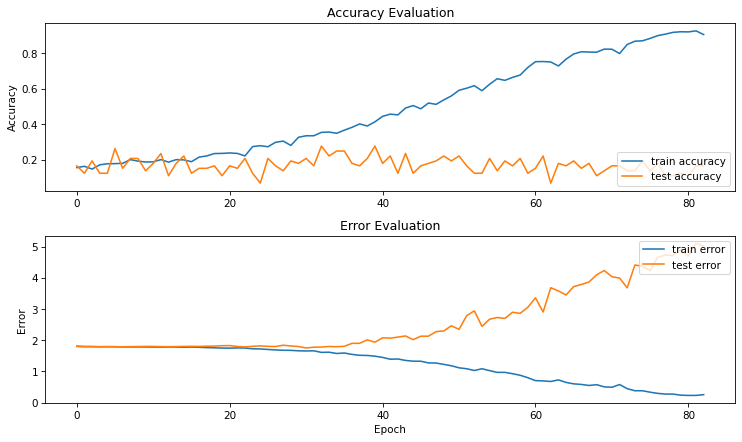

In [22]:
model.plot_history(history)

In [26]:
# without early stopping, epochs = 500

model2 = rnn_standard.RNN_std(num_outputs)
model2.initialize(X_test, y_test)

history2, duration2 = model2.train(X_train, X_test, y_train, y_test, batch_size=128, num_epochs=250, early_stop=False)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 128)               86528     
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 6)                 774       
Total params: 103,814
Trainable params: 103,814
Non-trainable params: 0
_________________________________________________________________
3/3 [==============================] - 0s 5ms/step - loss: 1.7979 - accuracy: 0.1667
Pre-training accuracy: 16.666

10/10 [==============================] - 0s 21ms/step - loss: 1.2242 - accuracy: 0.5358 - val_loss: 2.1214 - val_accuracy: 0.2222
Epoch 51/250
10/10 [==============================] - 0s 21ms/step - loss: 1.1880 - accuracy: 0.5700 - val_loss: 2.1970 - val_accuracy: 0.1944
Epoch 52/250
10/10 [==============================] - 0s 21ms/step - loss: 1.1967 - accuracy: 0.5417 - val_loss: 1.9936 - val_accuracy: 0.1944
Epoch 53/250
10/10 [==============================] - 0s 22ms/step - loss: 1.1419 - accuracy: 0.5842 - val_loss: 2.1711 - val_accuracy: 0.1944
Epoch 54/250
10/10 [==============================] - 0s 22ms/step - loss: 1.1082 - accuracy: 0.5925 - val_loss: 2.0513 - val_accuracy: 0.2361
Epoch 55/250
10/10 [==============================] - 0s 22ms/step - loss: 1.0955 - accuracy: 0.5908 - val_loss: 2.3946 - val_accuracy: 0.1944
Epoch 56/250
10/10 [==============================] - 0s 22ms/step - loss: 1.0391 - accuracy: 0.6233 - val_loss: 2.3952 - val_accuracy: 0.2083
Epoch 57/250

10/10 [==============================] - 0s 22ms/step - loss: 0.1107 - accuracy: 0.9592 - val_loss: 4.7995 - val_accuracy: 0.2222
Epoch 108/250
10/10 [==============================] - 0s 22ms/step - loss: 0.1200 - accuracy: 0.9592 - val_loss: 4.5484 - val_accuracy: 0.2222
Epoch 109/250
10/10 [==============================] - 0s 22ms/step - loss: 0.1195 - accuracy: 0.9592 - val_loss: 5.0620 - val_accuracy: 0.2361
Epoch 110/250
10/10 [==============================] - 0s 21ms/step - loss: 0.0900 - accuracy: 0.9742 - val_loss: 4.4746 - val_accuracy: 0.2500
Epoch 111/250
10/10 [==============================] - 0s 22ms/step - loss: 0.0788 - accuracy: 0.9725 - val_loss: 4.9537 - val_accuracy: 0.2083
Epoch 112/250
10/10 [==============================] - 0s 22ms/step - loss: 0.0667 - accuracy: 0.9792 - val_loss: 5.2706 - val_accuracy: 0.2222
Epoch 113/250
10/10 [==============================] - 0s 22ms/step - loss: 0.0445 - accuracy: 0.9900 - val_loss: 4.9769 - val_accuracy: 0.1944
Epoch 

Epoch 164/250
10/10 [==============================] - 0s 21ms/step - loss: 0.0039 - accuracy: 0.9992 - val_loss: 6.6256 - val_accuracy: 0.1806
Epoch 165/250
10/10 [==============================] - 0s 21ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 6.5340 - val_accuracy: 0.1944
Epoch 166/250
10/10 [==============================] - 0s 22ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 6.8594 - val_accuracy: 0.1944
Epoch 167/250
10/10 [==============================] - 0s 22ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 6.9914 - val_accuracy: 0.1944
Epoch 168/250
10/10 [==============================] - 0s 21ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 6.9275 - val_accuracy: 0.1806
Epoch 169/250
10/10 [==============================] - 0s 22ms/step - loss: 0.0031 - accuracy: 0.9992 - val_loss: 6.8646 - val_accuracy: 0.1806
Epoch 170/250
10/10 [==============================] - 0s 22ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 7.1067 - val_accuracy:

Epoch 220/250
10/10 [==============================] - 0s 21ms/step - loss: 4.5510e-04 - accuracy: 1.0000 - val_loss: 7.6616 - val_accuracy: 0.1806
Epoch 221/250
10/10 [==============================] - 0s 21ms/step - loss: 5.1377e-04 - accuracy: 1.0000 - val_loss: 7.6614 - val_accuracy: 0.1806
Epoch 222/250
10/10 [==============================] - 0s 22ms/step - loss: 3.2718e-04 - accuracy: 1.0000 - val_loss: 7.6708 - val_accuracy: 0.1806
Epoch 223/250
10/10 [==============================] - 0s 22ms/step - loss: 5.9281e-04 - accuracy: 1.0000 - val_loss: 7.7285 - val_accuracy: 0.2083
Epoch 224/250
10/10 [==============================] - 0s 22ms/step - loss: 3.9729e-04 - accuracy: 1.0000 - val_loss: 7.8071 - val_accuracy: 0.2083
Epoch 225/250
10/10 [==============================] - 0s 22ms/step - loss: 3.1306e-04 - accuracy: 1.0000 - val_loss: 7.8006 - val_accuracy: 0.2083
Epoch 226/250
10/10 [==============================] - 0s 21ms/step - loss: 2.3156e-04 - accuracy: 1.0000 - val_

In [27]:
model2.evaluate_model(X_train, X_test, y_train, y_test)

Testing Accuracy:  1.0
Duration of training:  0:00:59.875547 



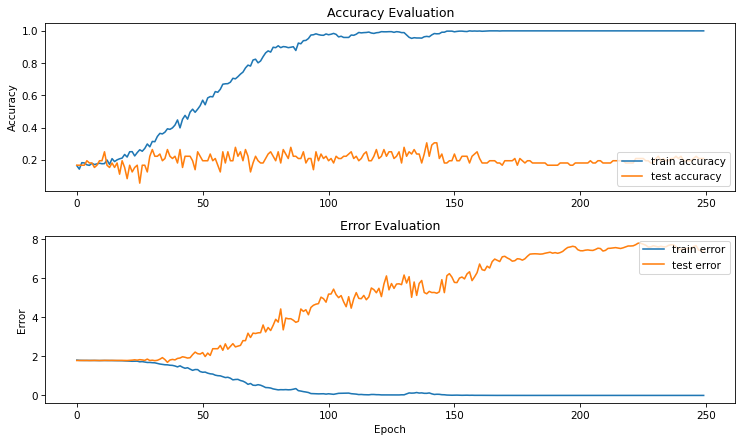

In [28]:
model2.plot_history(history2)

In [30]:
model2.testing_acc[1]

0.2083333283662796

In [31]:
model.testing_acc[1]

0.1666666716337204